# Departamento de vendas

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"));

C:\Users\walte\AppData\Local\Temp\ipykernel_110496\736818495.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Importação das bibliotecas e base de dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Dados das vendas

In [4]:
sales_train_df = pd.read_csv(r'C:\Users\walte\Documents\Aquivos_Walter\Python_projetos\Ciencia de dados para negocio\train.csv')

C:\Users\walte\AppData\Local\Temp\ipykernel_110496\4095519195.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv(r'C:\Users\walte\Documents\Aquivos_Walter\Python_projetos\Ciencia de dados para negocio\train.csv')


In [5]:
sales_train_df.shape

(1017209, 9)

In [6]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [8]:
sales_train_df['Open'].unique()

array([1, 0], dtype=int64)

In [9]:
sales_train_df['Promo'].unique()

array([1, 0], dtype=int64)

In [10]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [11]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [12]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [15]:
store_info_df = pd.read_csv(r'C:\Users\walte\Documents\Aquivos_Walter\Python_projetos\Ciencia de dados para negocio\store.csv')

In [16]:
store_info_df.shape

(1115, 10)

In [17]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das vendas

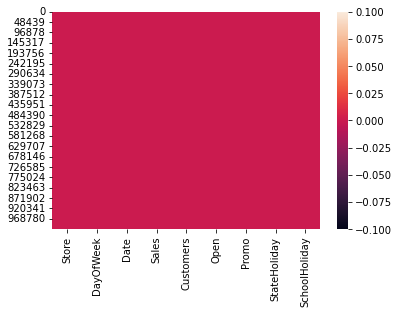

In [20]:
sns.heatmap(sales_train_df.isnull());

In [21]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

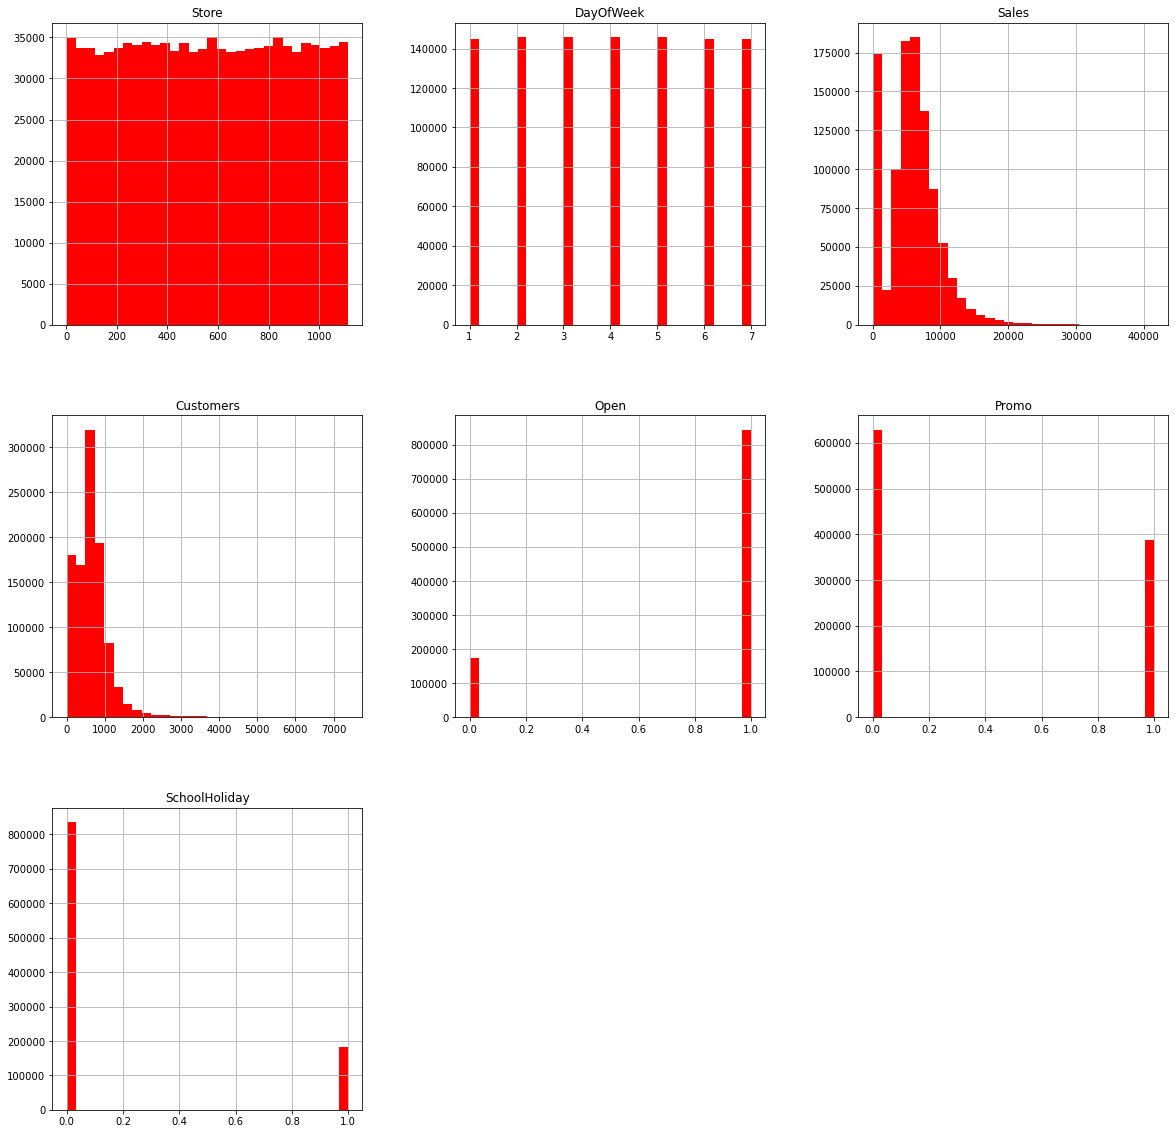

In [22]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [23]:
sales_train_df['Customers'].max()

7388

In [24]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [25]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [26]:
172817 / len(store_info_df)

154.99282511210762

In [27]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [28]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [29]:
sales_train_df.shape

(844392, 9)

In [30]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [31]:
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [32]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [33]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Dados das lojas

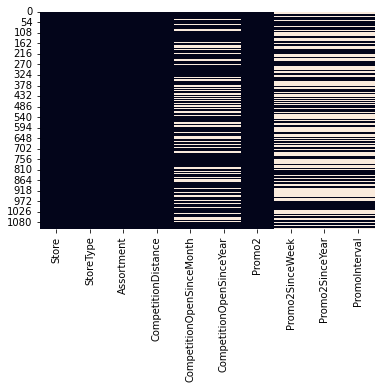

In [34]:
sns.heatmap(store_info_df.isnull(), cbar=False);

In [35]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [36]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [37]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [38]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [39]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

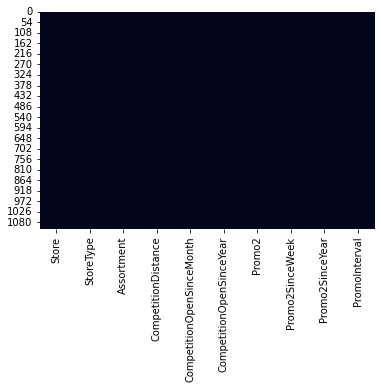

In [40]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [41]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

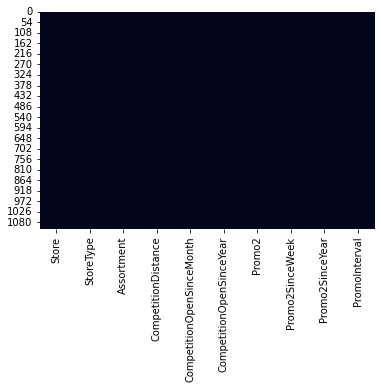

In [42]:
sns.heatmap(store_info_df.isnull(), cbar = False);

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

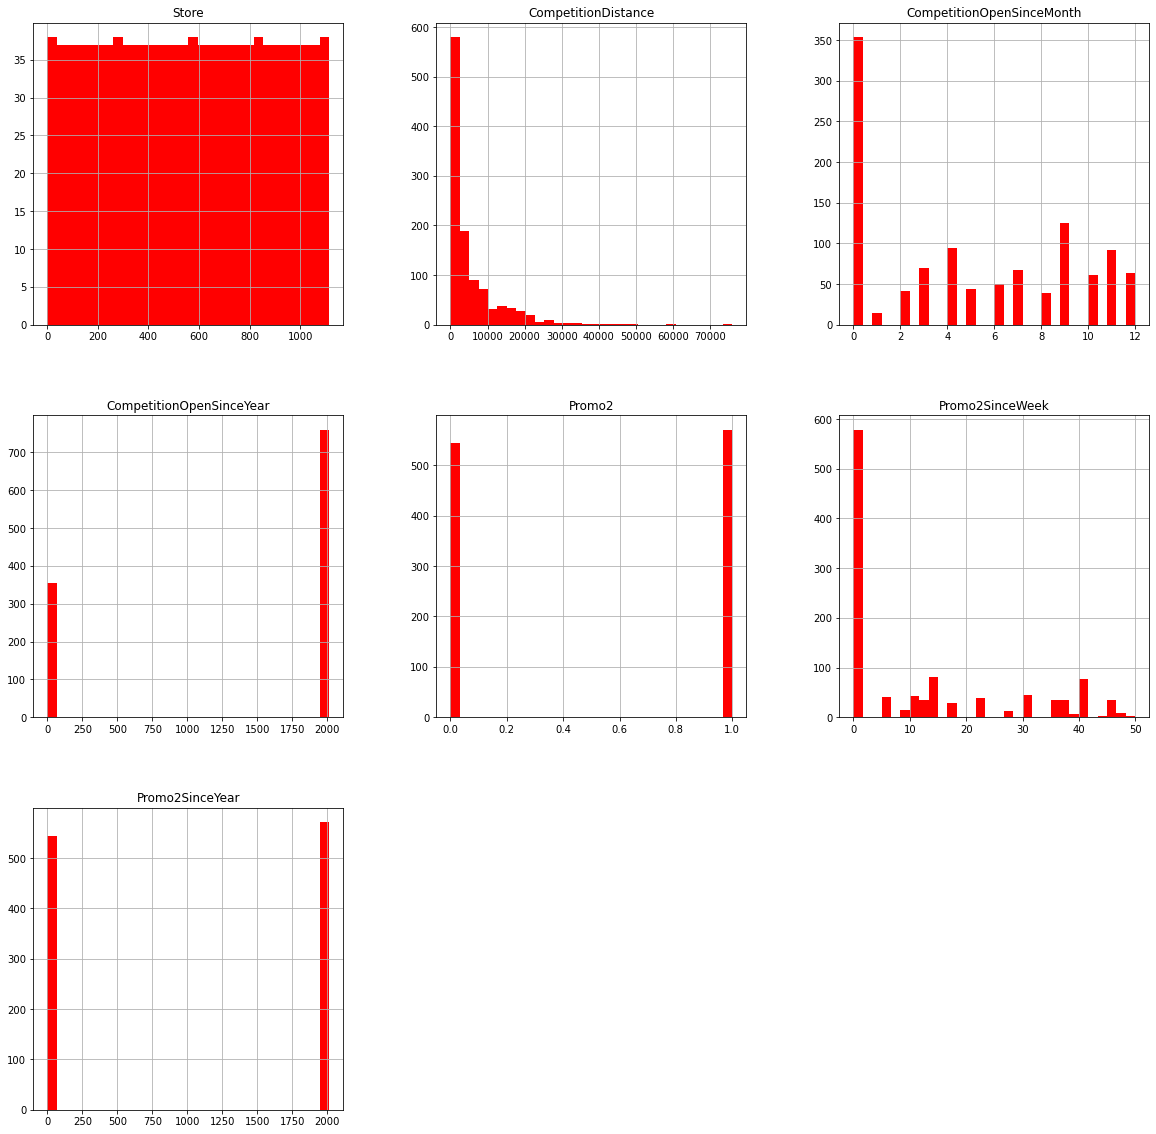

In [43]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

### Dados unidos (vendas + lojas)

In [44]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [45]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [46]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [47]:
sales_train_all_df.shape

(844392, 17)

In [48]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


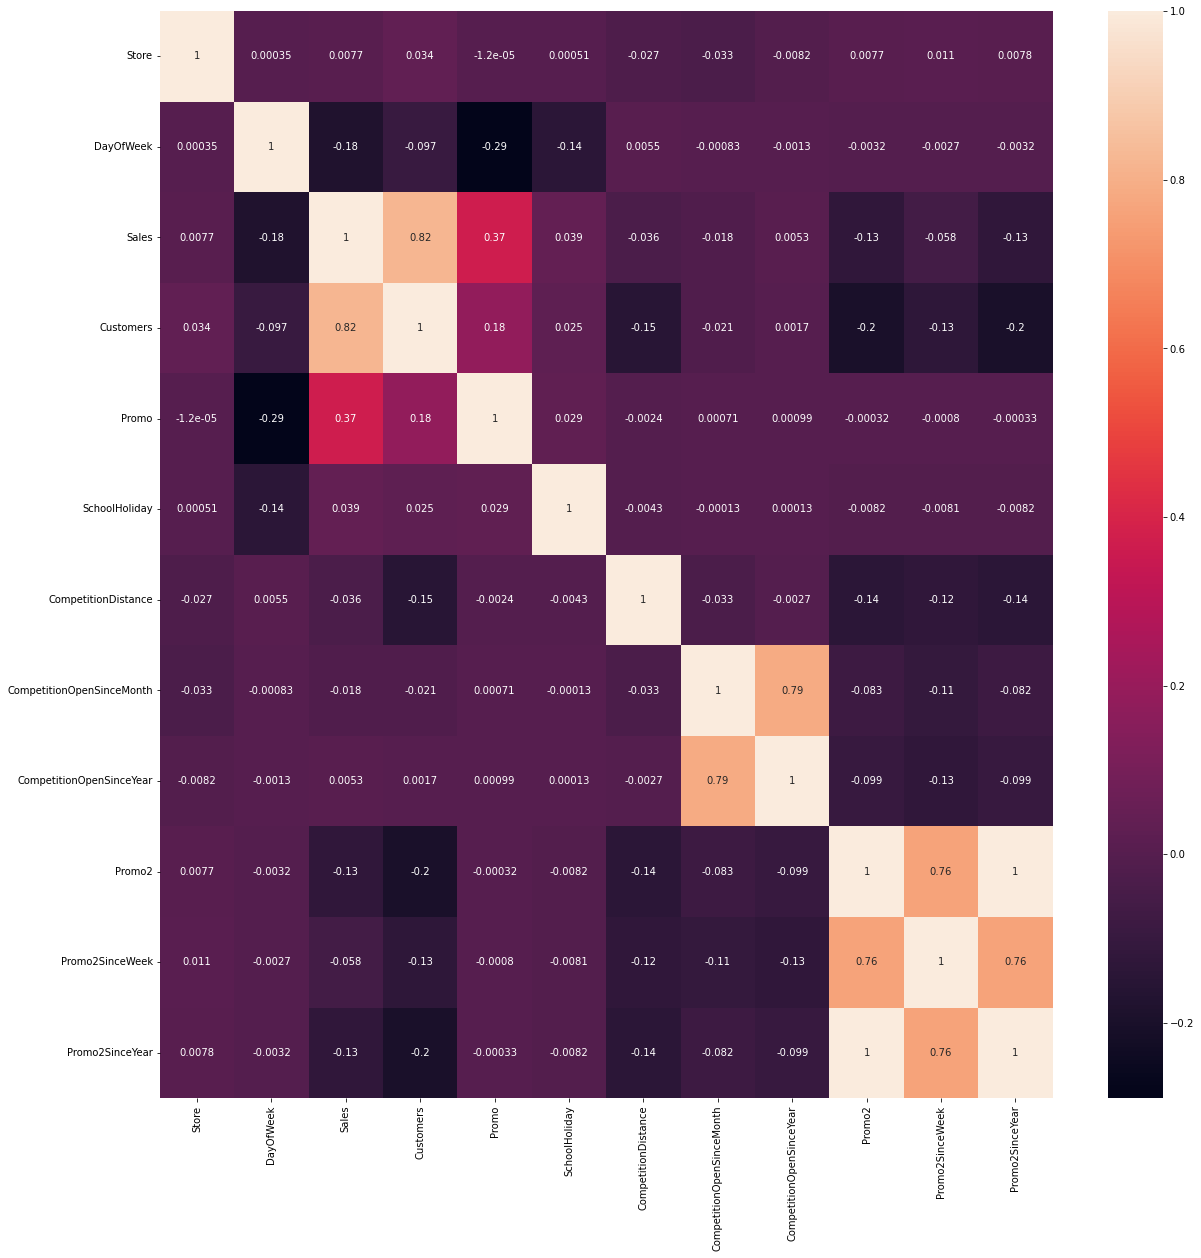

In [49]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [50]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [51]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [52]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [53]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [54]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

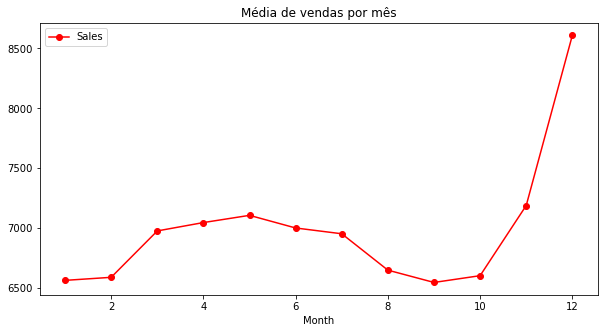

In [55]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

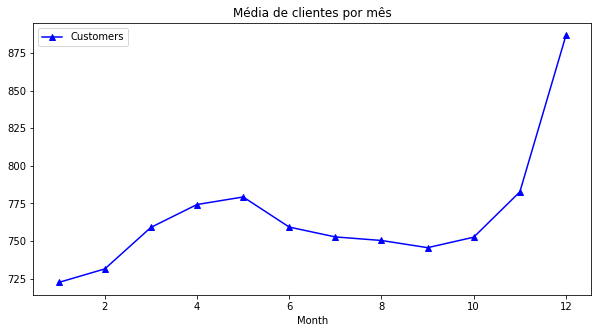

In [56]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

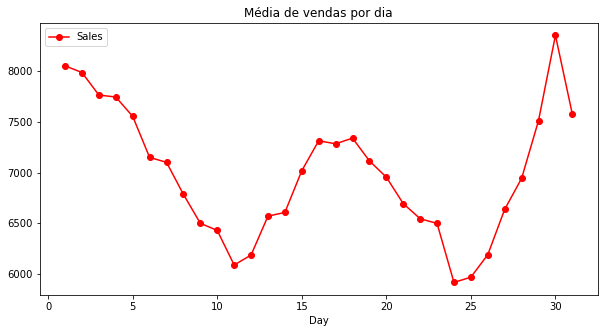

In [57]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

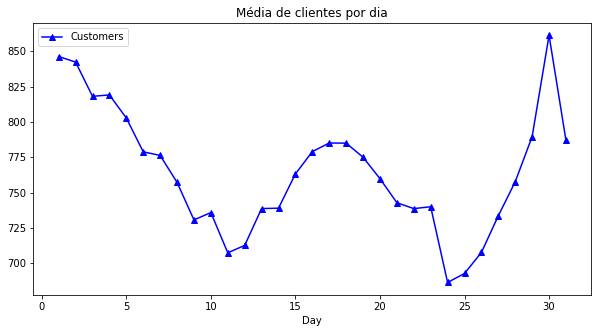

In [58]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

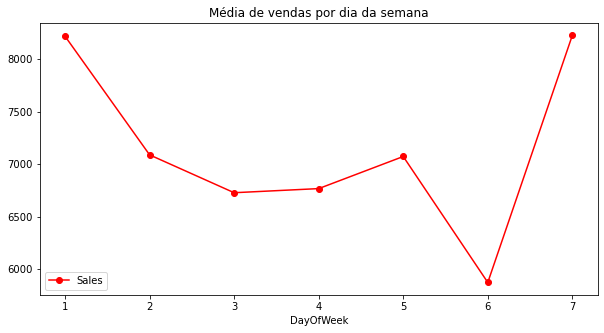

In [59]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

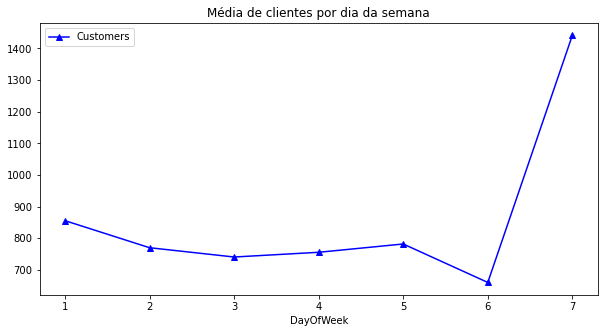

In [60]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

<AxesSubplot:xlabel='Date'>

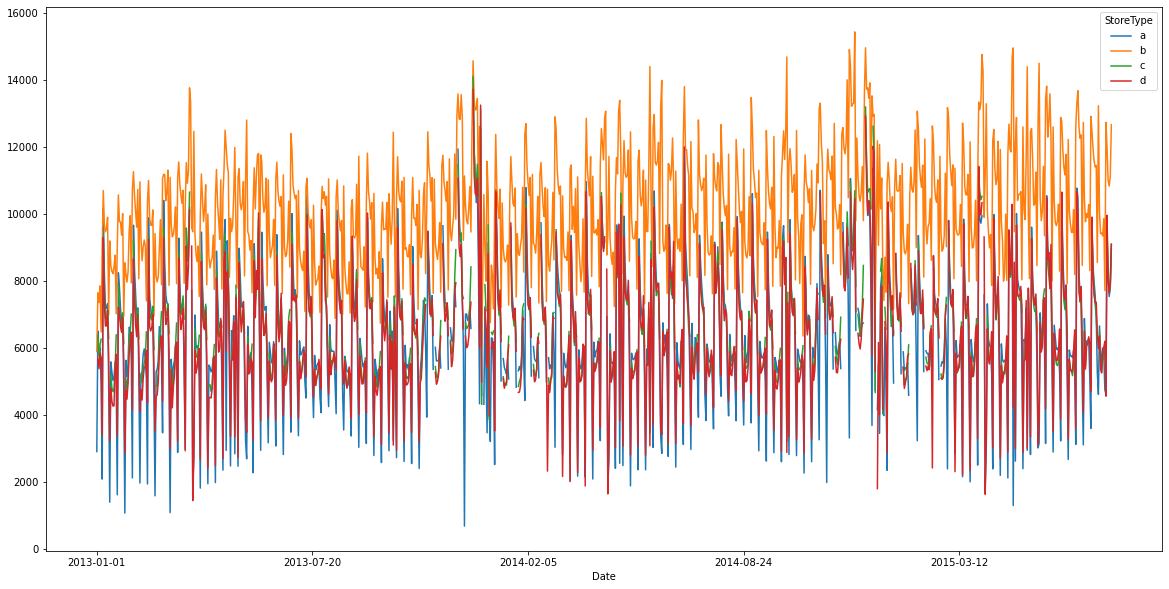

In [61]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

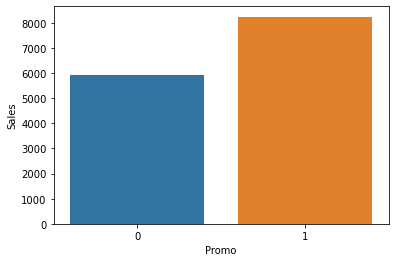

In [62]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

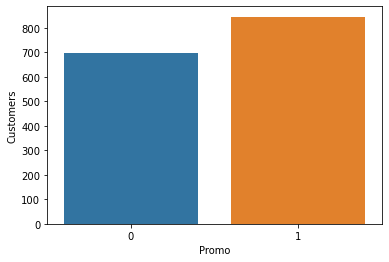

In [63]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

## Treinamento do modelo - parte 1

In [64]:
!pip install fbprophet

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\walte\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\walte\\AppData\\Local\\Temp\\pip-install-_uf5iq8n\\fbprophet_76a87c76f8e1453cbb650a9b72a8726e\\setup.py'"'"'; __file__='"'"'C:\\Users\\walte\\AppData\\Local\\Temp\\pip-install-_uf5iq8n\\fbprophet_76a87c76f8e1453cbb650a9b72a8726e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\walte\AppData\Local\Temp\pip-wheel-h7uwym8q'
       cwd: C:\Users\walte\AppData\Local\Temp\pip-install-_uf5iq8n\fbprophet_76a87c76f8e1453cbb650a9b72a8726e\
  Complete output (194 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating b


  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=214c811f060ce1bbfe9d644270fdcba5736ec565488e25087e3c69b7238c2238
  Stored in directory: c:\users\walte\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
  Running setup.py clean for pystan
Successfully built pymeeus
Failed to build fbprophet pystan
    Running setup.py install for pystan: started
    Running setup.py install for pystan: still running...
    Running setup.py install for pystan: finished with status 'error'


    File "<frozen importlib._bootstrap_external>", line 850, in exec_module
    File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
    File "C:\Users\walte\anaconda3\lib\site-packages\pandas\core\arrays\__init__.py", line 1, in <module>
      from pandas.core.arrays.base import (
    File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
    File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
    File "<frozen importlib._bootstrap_external>", line 850, in exec_module
    File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
    File "C:\Users\walte\anaconda3\lib\site-packages\pandas\core\arrays\base.py", line 68, in <module>
      from pandas.core import (
    File "<frozen importlib._bootstrap>", line 1058, in _handle_fromlist
    File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
    File "<frozen importlib

In [65]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [ ]:
#df = sales_prediction(10, sales_train_all_df, 60)
#df

In [ ]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [ ]:
df_origin.shape, df_prediction.shape

In [ ]:
df_prediction.head()

In [ ]:
df_prediction.tail(60)

In [ ]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [ ]:
df_origin.tail()

## Treinamento do modelo - parte 2


   - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  






In [ ]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [ ]:
sales_train_all_df.head()

In [ ]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

In [ ]:
school_holidays

In [ ]:
len(np.unique(school_holidays))

In [ ]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [ ]:
state_holidays.shape

In [ ]:
len(np.unique(state_holidays))

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

In [ ]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

In [ ]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [ ]:
df_prediction.head()


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\handler_tracking.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\handler_type_requirements.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\handler_work.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\hash_map.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\io_control.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\is_buffer_sequence.hpp -> build\lib.w

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail\hash_float.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail\limits.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context\continuation.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context\continuation_fcontext.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context\continuation_ucontext.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\context
  

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint\areal_areal.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint\box_box.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint\implementation.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint\interface.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\disjoint\linear_areal.hpp

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits\is_continuous_interval.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits\is_discrete.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits\is_discrete_interval.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits\is_element_container.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits\is_icl_container.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\icl\type_traits
  copying pystan\stan\lib\stan_math\lib\boost_1.69.

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc\or.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc\placeholders.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc\plus.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc\quote.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc\reverse_fold_impl.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\dmc


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\_cassert.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\_exception.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\comp_detected.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\endian_compat.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\os_detected.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\detail\platform_detected.h -> build\lib.win-amd64

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\delimit_out.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\directive.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\domain.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\format.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\format_auto.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\karma\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

